In [1]:
import networkx as nx

In [2]:
g = nx.Graph()

In [3]:
g.add_nodes_from([1,2,3,4,5])

In [4]:
g.add_edges_from([(1,2), (2,3), (2,4), (2,5), (3,5)]) 

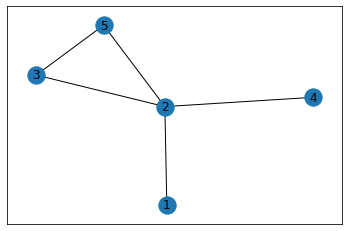

In [5]:
import matplotlib.pyplot as plt 
# networkX를 이용해서 시각화 하기
nx.draw_networkx(g)
plt.show()

feature vector (signal)

In [23]:
f = np.array([5, 30, 35, 65, 50])

In [6]:
# Add node attributes
# GNN을 하기 위해서는 feature 정보가 필요함
g.nodes[1]['age']=5
g.nodes[2]['age']=30
g.nodes[3]['age']=35
g.nodes[4]['age']=65
g.nodes[5]['age']=50

인접행렬 생성하기

In [7]:
import numpy as np

In [8]:
A = nx.to_numpy_array(g)

In [9]:
A

array([[0., 1., 0., 0., 0.],
       [1., 0., 1., 1., 1.],
       [0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 1., 0., 0.]])

디그리 행렬 생성하기

In [13]:
# 직접적으로 연결된 노드 개수
dict(g.degree()).values()

dict_values([1, 4, 2, 1, 2])

In [15]:
D = np.diag(np.array(list(dict(g.degree()).values())))

In [16]:
D

array([[1, 0, 0, 0, 0],
       [0, 4, 0, 0, 0],
       [0, 0, 2, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 2]])

Laplacian 행렬 구하기

In [17]:
L = nx.laplacian_matrix(g)

In [20]:
L=L.todense()

In [21]:
L

array([[ 1, -1,  0,  0,  0],
       [-1,  4, -1, -1, -1],
       [ 0, -1,  2,  0, -1],
       [ 0, -1,  0,  1,  0],
       [ 0, -1, -1,  0,  2]], dtype=int32)

In [22]:
D-A

array([[ 1., -1.,  0.,  0.,  0.],
       [-1.,  4., -1., -1., -1.],
       [ 0., -1.,  2.,  0., -1.],
       [ 0., -1.,  0.,  1.,  0.],
       [ 0., -1., -1.,  0.,  2.]])

Lf 

In [24]:
np.dot(L, f)

array([-25, -35, -10,  35,  35])

L의 고유값들과 고유벡터들 구하기

In [29]:
e_values, U = np.linalg.eig(L)

In [30]:
e_values

array([5.00000000e+00, 1.00000000e+00, 4.76114913e-17, 1.00000000e+00,
       3.00000000e+00])

In [32]:
U

array([[-2.23606798e-01, -8.66025404e-01, -4.47213595e-01,
        -1.37647092e-01,  1.85148379e-17],
       [ 8.94427191e-01,  5.18512068e-17, -4.47213595e-01,
         5.40869830e-17, -3.70296757e-17],
       [-2.23606798e-01,  2.88675135e-01, -4.47213595e-01,
         4.48941025e-01,  7.07106781e-01],
       [-2.23606798e-01,  2.88675135e-01, -4.47213595e-01,
        -7.60234957e-01, -6.65107298e-18],
       [-2.23606798e-01,  2.88675135e-01, -4.47213595e-01,
         4.48941025e-01, -7.07106781e-01]])

In [33]:
UT = U.T

In [38]:
np.dot(U[:,0].T,np.dot(L,U[:,0])) # 이는 첫 번째 고유값과 동일

5.000000000000002

Fourier Transform

In [39]:
f_hat = np.dot(U.T,f)

In [40]:
f_hat

array([ -7.82623792,  38.97114317, -82.73451517, -11.94352057,
       -10.60660172])

In [41]:
np.dot(U[:,0].T,f)

-7.826237921249266

In [42]:
np.dot(U.T,U)

array([[ 1.00000000e+00,  3.05205791e-16,  6.01249991e-17,
         8.84006481e-17, -4.98543705e-17],
       [ 3.05205791e-16,  1.00000000e+00, -1.22964271e-16,
         1.58941172e-01, -8.89809642e-18],
       [ 6.01249991e-17, -1.22964271e-16,  1.00000000e+00,
        -7.58332268e-17,  2.75724013e-17],
       [ 8.84006481e-17,  1.58941172e-01, -7.58332268e-17,
         1.00000000e+00, -4.20497475e-17],
       [-4.98543705e-17, -8.89809642e-18,  2.75724013e-17,
        -4.20497475e-17,  1.00000000e+00]])

## Scenario 1

같은 노드, 같은 연결, but different signals <br>
signal이 취할 수 있는 값 => -1, 1

Case 1

In [43]:
g1 = nx.Graph()
g1.add_nodes_from([1,2,3,4])
g1.add_edges_from([(1,2), (1,3), (2,4), (3,4)])

In [44]:
f1 = np.array([1, 1, 1, 1])

In [45]:
L1 = nx.laplacian_matrix(g1)

In [46]:
L1 = L1.todense()

In [47]:
L1

array([[ 2, -1, -1,  0],
       [-1,  2,  0, -1],
       [-1,  0,  2, -1],
       [ 0, -1, -1,  2]], dtype=int32)

In [64]:
e_values1, U1 = np.linalg.eig(L1)

In [65]:
np.set_printoptions(suppress=True)

In [66]:
e_values1

array([ 4., -0.,  2.,  2.])

In [67]:
U1

array([[-0.5       ,  0.5       ,  0.70710678,  0.40824829],
       [ 0.5       ,  0.5       ,  0.        , -0.57735027],
       [ 0.5       ,  0.5       , -0.        ,  0.57735027],
       [-0.5       ,  0.5       , -0.70710678, -0.40824829]])

In [71]:
idx = np.argsort(e_values1)  
e_values1 = e_values1[idx]
U1 = U1[:,idx]

In [72]:
e_values1

array([-0.,  2.,  2.,  4.])

In [73]:
U1

array([[ 0.5       ,  0.40824829,  0.70710678, -0.5       ],
       [ 0.5       , -0.57735027,  0.        ,  0.5       ],
       [ 0.5       ,  0.57735027, -0.        ,  0.5       ],
       [ 0.5       , -0.40824829, -0.70710678, -0.5       ]])

위 결과에 대한 설명 <br>
각 고유벡터의 고유값은 각 고유벡터의 smootheness를 의미함 <br>
즉, 원소 값들의 차이가 얼마나 큰지를 의미, 고유값이 작으면 원소값들의 차이가 작다는 것을 의미 <br> 
고유값이 0인 경우에는 차이 없음 즉, 모든 원소가 같은 값을 갖음 (첫번째 고유벡터의 경우)

In [74]:
# Fourier transform
f1_hat = np.dot(U1.T,f1)

In [75]:
f1_hat

array([ 2.,  0.,  0., -0.])

f1_hat의 값은 각 고유벡터가 원래의 signal을 설명하는데 있어 얼마나 중요한 역할을 하는지를 나타냄 <br>
위의 결과의 경우, 첫 번째 고유벡터의 역할이 제일 큼 (나머지 고유벡터의 역할은 없음) <br>
고유값=0인 고유벡터의 역할이 제일 크기 때문에 이는 원래의 signal의 smooth한 정도가 굉장히 크다는 것을 의미 <br>
위의 경우, 모든 노드의 signal 값이 동일함 

In [76]:
import matplotlib.pyplot as plt

<BarContainer object of 4 artists>

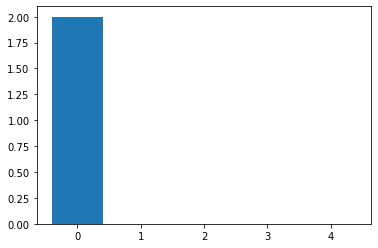

In [77]:
plt.bar(e_values1, f1_hat)

### Case 2

In [81]:
f2 = np.array([1, 1, -1, -1])

고유벡터와 고유값은 앞의 경우와 동일 (이는 노드들과 노드들 간의 연결이 동일하기 때문임)

In [79]:
e_values1

array([-0.,  2.,  2.,  4.])

In [80]:
U1

array([[ 0.5       ,  0.40824829,  0.70710678, -0.5       ],
       [ 0.5       , -0.57735027,  0.        ,  0.5       ],
       [ 0.5       ,  0.57735027, -0.        ,  0.5       ],
       [ 0.5       , -0.40824829, -0.70710678, -0.5       ]])

In [82]:
# Fourier transform
f2_hat = np.dot(U1.T,f2)

In [83]:
f2_hat

array([ 0.        , -0.33820396,  1.41421356, -0.        ])

<BarContainer object of 4 artists>

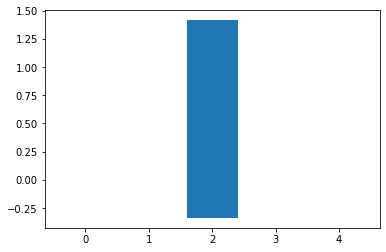

In [84]:
plt.bar(e_values1, f2_hat)

In [85]:
f3 = np.array([1, -1, 1, -1])

In [86]:
f3_hat = np.dot(U1.T,f3)

In [87]:
f3_hat

array([0.        , 1.97119712, 1.41421356, 0.        ])

In [88]:
f4 = np.array([-1, 1, 1, -1])

In [89]:
f4_hat = np.dot(U1.T,f4)

In [90]:
f4_hat

array([-0.,  0.,  0.,  2.])

## Scenario 2

In [95]:
f2_0 = np.array([1,1,-1,-1])

Case 1

In [91]:
g2_1 = nx.Graph()
g2_1.add_nodes_from([1,2,3,4])
g2_1.add_edges_from([(1,3), (2,4)])

In [92]:
L2_1 = nx.laplacian_matrix(g2_1)
L2_1 = L2_1.todense()
e_values2_1, U2_1 = np.linalg.eig(L2_1)
idx = np.argsort(e_values2_1)  
e_values2_1 = e_values2_1[idx]
U2_1 = U2_1[:,idx]

In [93]:
e_values2_1

array([0., 0., 2., 2.])

In [94]:
U2_1

array([[ 0.70710678,  0.        ,  0.70710678,  0.        ],
       [ 0.        ,  0.70710678,  0.        ,  0.70710678],
       [ 0.70710678,  0.        , -0.70710678,  0.        ],
       [ 0.        ,  0.70710678,  0.        , -0.70710678]])

In [99]:
U2_1[:,0] # 아래 결과는 연결되어 있는 노드들의 시그날이 같다는 것을 의미

array([0.70710678, 0.        , 0.70710678, 0.        ])

In [96]:
f2_1_hat = np.dot(U2_1.T,f2_0)

In [97]:
f2_1_hat 

array([0.        , 0.        , 1.41421356, 1.41421356])

위 결과는 u2, u3의 설명력이 제일 크다는 것을 의미 <br>
해당 고유벡터로 나타내어 지는 축으로 설명이 제일 많이 된다. 

Case 2

In [101]:
g2_2 = nx.Graph()
g2_2.add_nodes_from([1,2,3,4])
g2_2.add_edges_from([(1,2), (3,4)])
L2_2 = nx.laplacian_matrix(g2_2)
L2_2 = L2_2.todense()
e_values2_2, U2_2 = np.linalg.eig(L2_2)
idx = np.argsort(e_values2_2)  
e_values2_2 = e_values2_2[idx]
U2_2 = U2_2[:,idx]

In [102]:
e_values2_2

array([0., 0., 2., 2.])

In [103]:
U2_2 

array([[ 0.70710678,  0.        ,  0.70710678,  0.        ],
       [ 0.70710678,  0.        , -0.70710678,  0.        ],
       [ 0.        ,  0.70710678,  0.        ,  0.70710678],
       [ 0.        ,  0.70710678,  0.        , -0.70710678]])

In [104]:
f2_2_hat = np.dot(U2_2.T,f2_0)

In [105]:
f2_2_hat

array([ 1.41421356, -1.41421356,  0.        ,  0.        ])

Case 3

In [110]:
g2_3 = nx.Graph()
g2_3.add_nodes_from([1,2,3,4])
g2_3.add_edges_from([(2,3), (3,4)])
L2_3 = nx.laplacian_matrix(g2_3)
L2_3 = L2_3.todense()
e_values2_3, U2_3 = np.linalg.eig(L2_3)
idx = np.argsort(e_values2_3)  
e_values2_3 = e_values2_3[idx]
U2_3 = U2_3[:,idx]

In [111]:
e_values2_3

array([-0.,  0.,  1.,  3.])

In [112]:
U2_3 

array([[ 0.        ,  1.        ,  0.        ,  0.        ],
       [ 0.57735027,  0.        ,  0.70710678, -0.40824829],
       [ 0.57735027,  0.        ,  0.        ,  0.81649658],
       [ 0.57735027,  0.        , -0.70710678, -0.40824829]])

In [113]:
f2_3_hat = np.dot(U2_3.T,f2_0)

In [114]:
f2_3_hat

array([-0.57735027,  1.        ,  1.41421356, -0.81649658])

The obtained coefficients f ̂  denote how much the corresponding graph Fourier basis (즉, 고유벡터) contributes to the input signal. => 즉, coefficient 값이 클수록 고유벡터와 원래의 signal 즉, f와의 관련도가 높다는 것을 의미 

In [123]:
for k in range(4):
    print(k)
    print('f_hat: ', f2_3_hat[k])
    print('eigenvalue: ', e_values2_3[k])
    print(np.dot(f2_0, U2_3[:,k])/(np.linalg.norm(f2_0)*np.linalg.norm(U2_3[:,k])))
    print('\n\n')

0
f_hat:  -0.577350269189626
eigenvalue:  -3.367702055640532e-17
-0.28867513459481303



1
f_hat:  1.0
eigenvalue:  0.0
0.5



2
f_hat:  1.4142135623730947
eigenvalue:  0.9999999999999998
0.7071067811865475



3
f_hat:  -0.8164965809277267
eigenvalue:  2.999999999999999
-0.40824829046386335





## Poly-Filter의 예

In [124]:
g = nx.Graph()
g.add_nodes_from([1,2,3,4])
g.add_edges_from([(1,2), (1,3), (2,4), (3,4)])

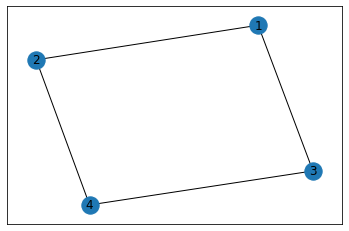

In [125]:
nx.draw_networkx(g)
plt.show()

In [126]:
f = np.array([1,1,-1,-1])

In [127]:
L = nx.laplacian_matrix(g)
L = L.todense()

In [128]:
L

array([[ 2, -1, -1,  0],
       [-1,  2,  0, -1],
       [-1,  0,  2, -1],
       [ 0, -1, -1,  2]], dtype=int32)

In [129]:
np.dot(L,L)

array([[ 6, -4, -4,  2],
       [-4,  6,  2, -4],
       [-4,  2,  6, -4],
       [ 2, -4, -4,  6]], dtype=int32)

In [130]:
A = nx.to_numpy_array(g)

In [131]:
A

array([[0., 1., 1., 0.],
       [1., 0., 0., 1.],
       [1., 0., 0., 1.],
       [0., 1., 1., 0.]])

In [133]:
np.dot(A,A)

array([[2., 0., 0., 2.],
       [0., 2., 2., 0.],
       [0., 2., 2., 0.],
       [2., 0., 0., 2.]])

Another example

In [134]:
g1 = nx.Graph()

In [135]:
g1.add_nodes_from([1,2,3,4,5,6])
g1.add_edges_from([(1,3), (2,4), (2,5), (2,6), (3,4), (4,6), (5,6)]) 

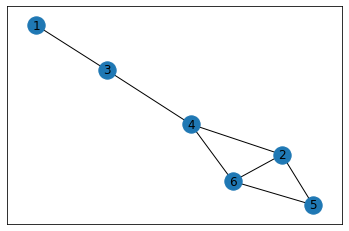

In [137]:
nx.draw_networkx(g1)
plt.show()

In [138]:
A1= nx.to_numpy_array(g1, weight=None)

In [139]:
A1

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1.],
       [1., 0., 0., 1., 0., 0.],
       [0., 1., 1., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 1., 0.]])

In [140]:
np.dot(A1,A1)

array([[1., 0., 0., 1., 0., 0.],
       [0., 3., 1., 1., 1., 2.],
       [0., 1., 2., 0., 0., 1.],
       [1., 1., 0., 3., 2., 1.],
       [0., 1., 0., 2., 2., 1.],
       [0., 2., 1., 1., 1., 3.]])

Another example

In [141]:
g2 = nx.Graph()
g2.add_nodes_from([1,2,3,4])
g2.add_edges_from([(1,2), (2,3), (3,4)])

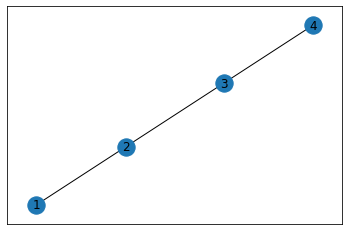

In [142]:
nx.draw_networkx(g2)
plt.show()

In [143]:
L2 = nx.laplacian_matrix(g2)
L2 = L2.todense()

In [144]:
L2

array([[ 1, -1,  0,  0],
       [-1,  2, -1,  0],
       [ 0, -1,  2, -1],
       [ 0,  0, -1,  1]], dtype=int32)

In [146]:
L2_squared = np.dot(L2,L2)

In [147]:
L2_squared

array([[ 2, -3,  1,  0],
       [-3,  6, -4,  1],
       [ 1, -4,  6, -3],
       [ 0,  1, -3,  2]], dtype=int32)

In [148]:
_, e_vectors = np.linalg.eig(L2_squared)

In [149]:
e_vectors

array([[ 0.27059805, -0.5       ,  0.65328148,  0.5       ],
       [-0.65328148,  0.5       ,  0.27059805,  0.5       ],
       [ 0.65328148,  0.5       , -0.27059805,  0.5       ],
       [-0.27059805, -0.5       , -0.65328148,  0.5       ]])

In [152]:
np.dot(e_vectors[:,0],e_vectors[:,1])

-3.3306690738754696e-16

In [151]:
np.set_printoptions(suppress=True)

In [153]:
np.dot(e_vectors[:,0],e_vectors[:,2])

0.0

In [154]:
np.dot(e_vectors[:,0],e_vectors[:,3])

-1.1102230246251565e-16